# TLDR: Macro Avg. F1 = 33% (5 Classes)
# TLDR: Macro Avg. F1 = 75% (2 Classes)

# Default Setup

In [1]:
# Dataloading Stuff
from google.colab import drive
from sys import path
import os

# Standard Stuff
!pip3 install numpy sklearn iterative-stratification pandas pyss3
from sklearn.model_selection import train_test_split

from pyss3 import SS3
from pyss3.util import Dataset, Evaluation, span

import numpy as np
import pandas as pd

drive.mount('/content/drive', force_remount=True)
path_root = '/content/drive/My Drive/NLP Lab/SingleLabel/'
path.append(path_root)
data_root = 'data/'

     |████████████████████████████████| 2.0MB 4.7MB/s 
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Load Data
Important: We only load some parts of the dataset (~200 MB), since the whole dataset consitst of 25 GB.

In [5]:
import json
files = []
text = []
labels = []
failed_counter = 0

for _, _, file_names in os.walk(path_root + data_root + "AmazonReview2018"):
  for file_name in file_names:
    if '.json' in file_name:
      files.append(file_name)

for j_file in files[:4]:
  with open(path_root + data_root + "AmazonReview2018/" + j_file, "r") as json_file:
    for line in json_file:
      json_data = json.loads(line)
      try:
        text.append(json_data['reviewText'])
        labels.append(str(json_data['overall']))
      except KeyError:
        failed_counter += 1

print(len(text), failed_counter)
X_train, X_val, y_train, y_val = train_test_split(text, labels, test_size=0.2)

504897 310


# Classification for 5 Classes

Classification: 100%|██████████| 100980/100980 [00:01<00:00, 54970.23it/s]



              precision    recall  f1-score   support

         1.0       0.22      0.65      0.33      2923
         2.0       0.12      0.12      0.12      2583
         3.0       0.34      0.15      0.21      5916
         4.0       0.18      0.16      0.17     12352
         5.0       0.84      0.83      0.83     77206

    accuracy                           0.68    100980
   macro avg       0.34      0.38      0.33    100980
weighted avg       0.69      0.68      0.68    100980


 Accuracy: 0.681

[ updating evaluations cache ]


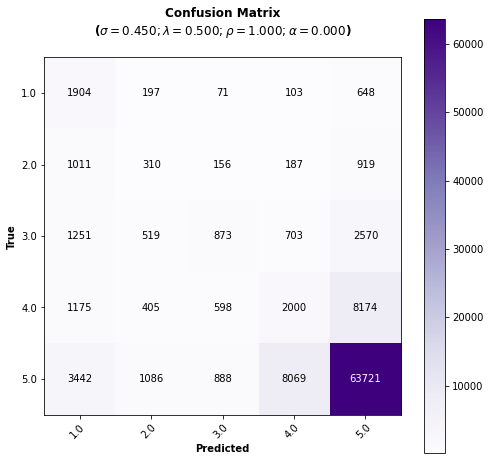

0.33094676979914245

In [6]:
clf = SS3()
clf.fit(X_train, y_train)
Evaluation.test(clf, X_val, y_val, metric="f1-score")

# Classification with 2 Classes
Here we map the values 1-3 to negative and the values 4,5 to positive.

Classification: 100%|██████████| 100980/100980 [00:01<00:00, 54125.18it/s]



              precision    recall  f1-score   support

    negative       0.57      0.57      0.57     11418
    positive       0.94      0.95      0.95     89562

    accuracy                           0.90    100980
   macro avg       0.76      0.76      0.76    100980
weighted avg       0.90      0.90      0.90    100980


 Accuracy: 0.903

[ updating evaluations cache ]


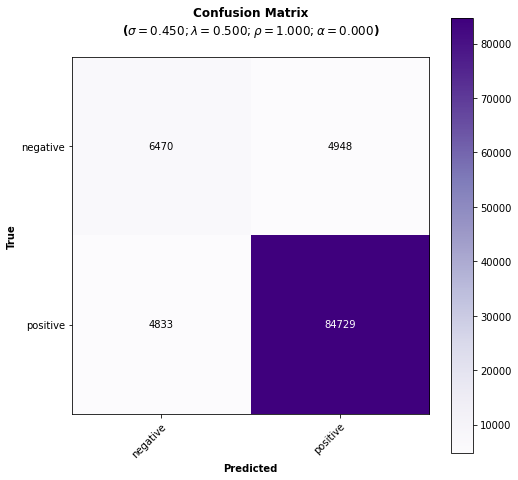

0.7574737948625175

In [7]:
df = pd.Series(labels).astype(str)
df.replace({'1.0': 'negative', '2.0': 'negative', '3.0': 'negative', '4.0': 'positive', '5.0': 'positive'}, inplace=True, regex=True)
new_labels = df.to_list()
X_train2, X_val2, y_train2, y_val2 = train_test_split(text, new_labels, test_size=0.2)

clf = SS3()
clf.fit(X_train2, y_train2)
Evaluation.clear_cache()
Evaluation.test(clf, X_val2, y_val2, metric="f1-score")